In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
raw_data_train=pd.read_csv('titanic_train.csv')
raw_data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Part 1: data exploratory

In [6]:
raw_data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
raw_data_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


## create heatmap to identify missing values

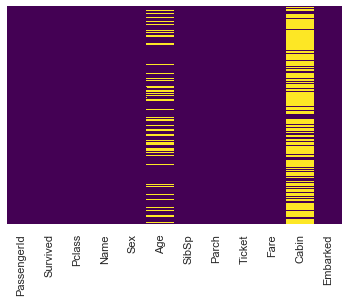

In [8]:
sns.heatmap(raw_data_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
sns.set_style('whitegrid')

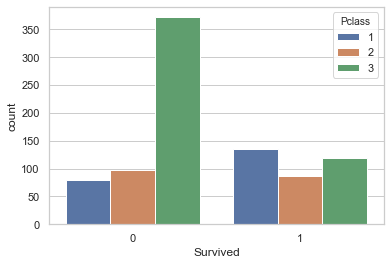

In [22]:
sns.countplot(x='Survived',hue='Pclass',data=raw_data_train)

In [23]:
raw_data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

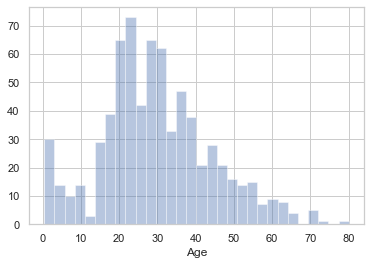

In [24]:
sns.distplot(raw_data_train['Age'].dropna(),kde=False,bins=30)

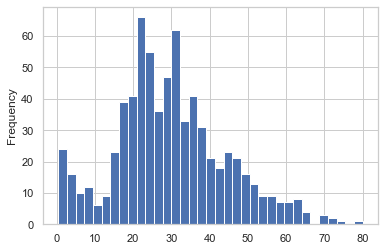

In [28]:
#another way to plot histogram with sns:
raw_data_train['Age'].plot.hist(bins=35)

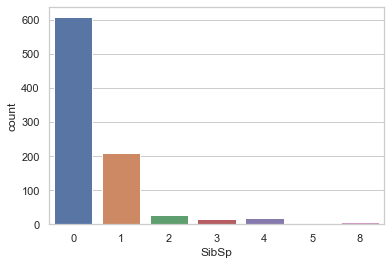

In [30]:
sns.countplot(x='SibSp',data=raw_data_train)

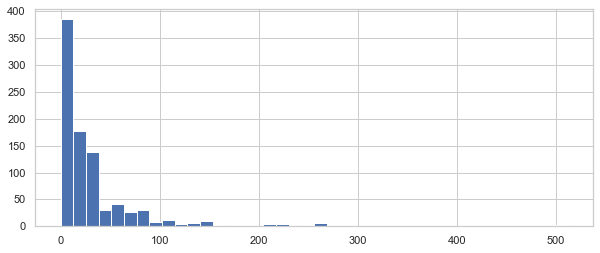

In [32]:
raw_data_train['Fare'].hist(bins=40,figsize=(10,4))

## interactive plot: cufflinks

In [34]:
#import cufflinks as cf

## part 2: cleaning data

#### create a boxplot, dealing with missing values

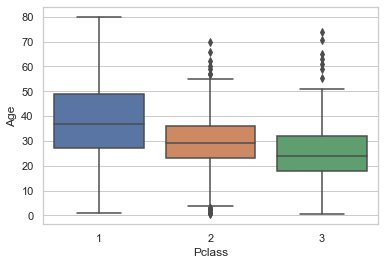

In [35]:
sns.boxplot(x='Pclass',y='Age',data=raw_data_train)

#### impute missing values in Age by the mean age value of each class:

In [36]:
def impute_age(cols):
    Age = cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [37]:
raw_data_train['Age']=raw_data_train[['Age','Pclass']].apply(impute_age,axis=1)

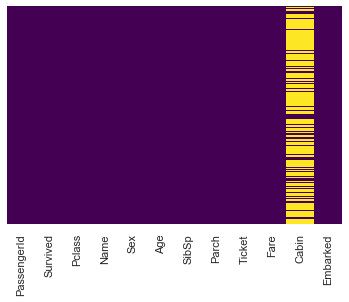

In [38]:
sns.heatmap(raw_data_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Cabin col: too much missing value -> better drop it off

In [39]:
data_1_train=raw_data_train.drop(['Cabin'],axis=1)
data_1_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


#### remove missing value in embarked

In [40]:
data_1_train.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### convert into dummies:

In [44]:
data_1_train['Sex']=pd.get_dummies(data_1_train['Sex'],drop_first=True) 
#using drop_first=True to avoid multicolinearity

In [51]:
data_1_train['Embarked_dummies']=pd.get_dummies(data_1_train['Embarked'],drop_first=True)
data_1_train['Embarked_dummies']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    1
Name: Embarked_dummies, Length: 891, dtype: uint8

### drop the columns that no longer needed

In [48]:
data_1_cleaned=data_1_train.drop(['PassengerId','Name','Ticket'],axis=1)

In [49]:
data_1_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0
887,1,1,0,19.0,0,0,30.0000,0
888,0,3,0,24.0,1,2,23.4500,0
889,1,1,1,26.0,0,0,30.0000,0


## Train and predict

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
x=data_1_cleaned.drop(['Survived'],axis=1)
y=data_1_cleaned['Survived']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [63]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
predict=logmodel.predict(x_test)

In [67]:
logmodel.score(x_train,y_train)

0.8186195826645265

In [68]:
logmodel.coef_

array([[-1.07270398, -2.60579639, -0.04048573, -0.31435995, -0.08789256,
         0.0049485 ,  0.24849971]])

In [76]:
logmodel.coef_.T.shape

(7, 1)

In [81]:
from sklearn.metrics import confusion_matrix

In [84]:
confusion_matrix(y_test,predict)

array([[133,  21],
       [ 38,  76]], dtype=int64)

## Summary table

In [85]:
summary=pd.DataFrame(np.exp(logmodel.coef_.T),x.columns,columns=['coeff'])
summary

,coeff
Pclass,0.342082
Sex,0.073844
Age,0.960323
SibSp,0.730256
Parch,0.915859
Fare,1.004961
Embarked,1.282100


In [86]:
np.exp(0.042)

1.0428944787507632